In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = "C:\\Users\\dhruv\\Downloads\\historical_automobile_sales.csv"
pd.read_csv(file_path)


,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,8/31/2023,2023,Aug,0,103.36,0.25,27852.993,1793,6,57.169,0.764155,2.6,1579.6,Executivecar,New York
524,9/30/2023,2023,Sep,0,101.55,0.07,21183.704,1028,5,59.315,0.036180,2.5,1123.4,Smallfamiliycar,California
525,10/31/2023,2023,Oct,0,124.66,0.12,15975.589,1148,9,19.472,-2.046169,2.5,1685.9,Sports,California
526,11/30/2023,2023,Nov,0,97.09,0.25,16862.288,4850,5,27.904,0.302179,2.9,2124.6,Smallfamiliycar,Georgia


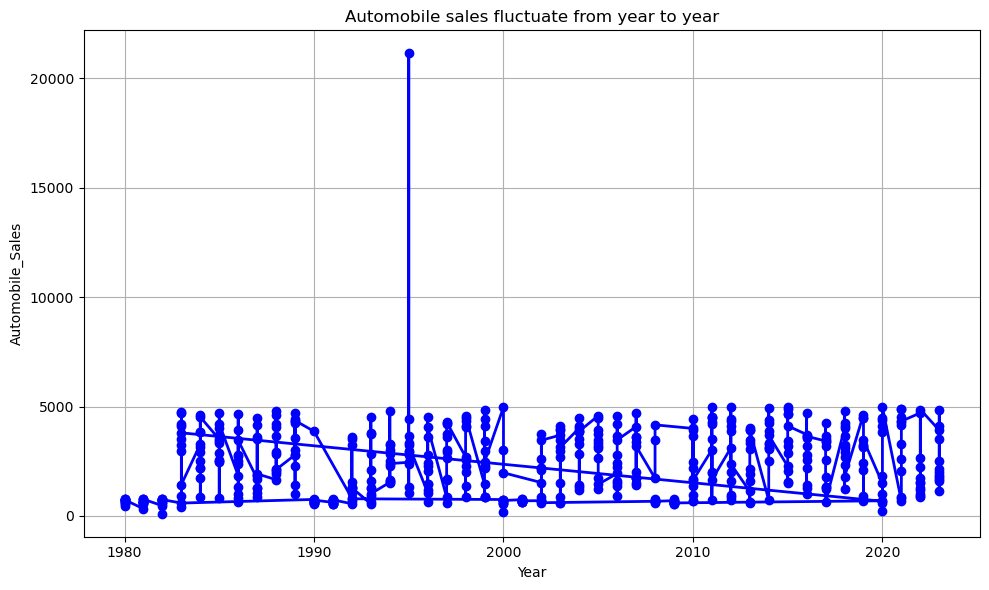

In [7]:
#Q 1: Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year. 
data = pd.read_csv(file_path)

plt.figure(figsize =(10,6))
plt.plot(data["Year"],data["Automobile_Sales"],marker='o',color="b",linestyle="-",linewidth="2")
plt.xlabel("Year")
plt.ylabel("Automobile_Sales")
plt.title("Automobile sales fluctuate from year to year")
plt.grid()
plt.tight_layout()
plt.show()

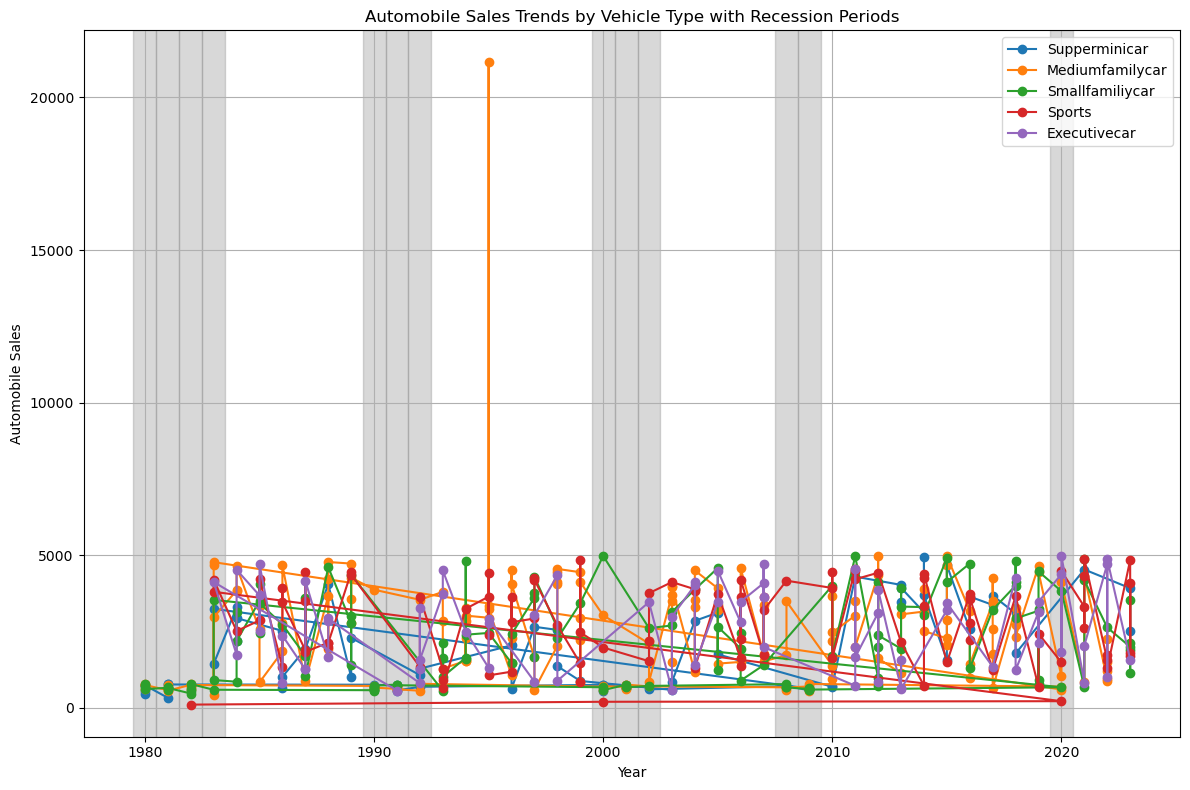

In [9]:
#Q 2: Plot different lines for categories of vehicle type and analyze the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?

vehicle_types = data['Vehicle_Type'].unique()

plt.figure(figsize=(12, 8))

for vehicle in vehicle_types:
    vehicle_data = data[data['Vehicle_Type'] == vehicle]
    plt.plot(vehicle_data['Year'], vehicle_data['Automobile_Sales'], marker='o', label=vehicle)

recession_data = data[data['Recession'] == 1]

for recession_year in recession_data['Year'].unique():
    plt.axvspan(recession_year - 0.5, recession_year + 0.5, color='gray', alpha=0.3)

plt.title('Automobile Sales Trends by Vehicle Type with Recession Periods')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


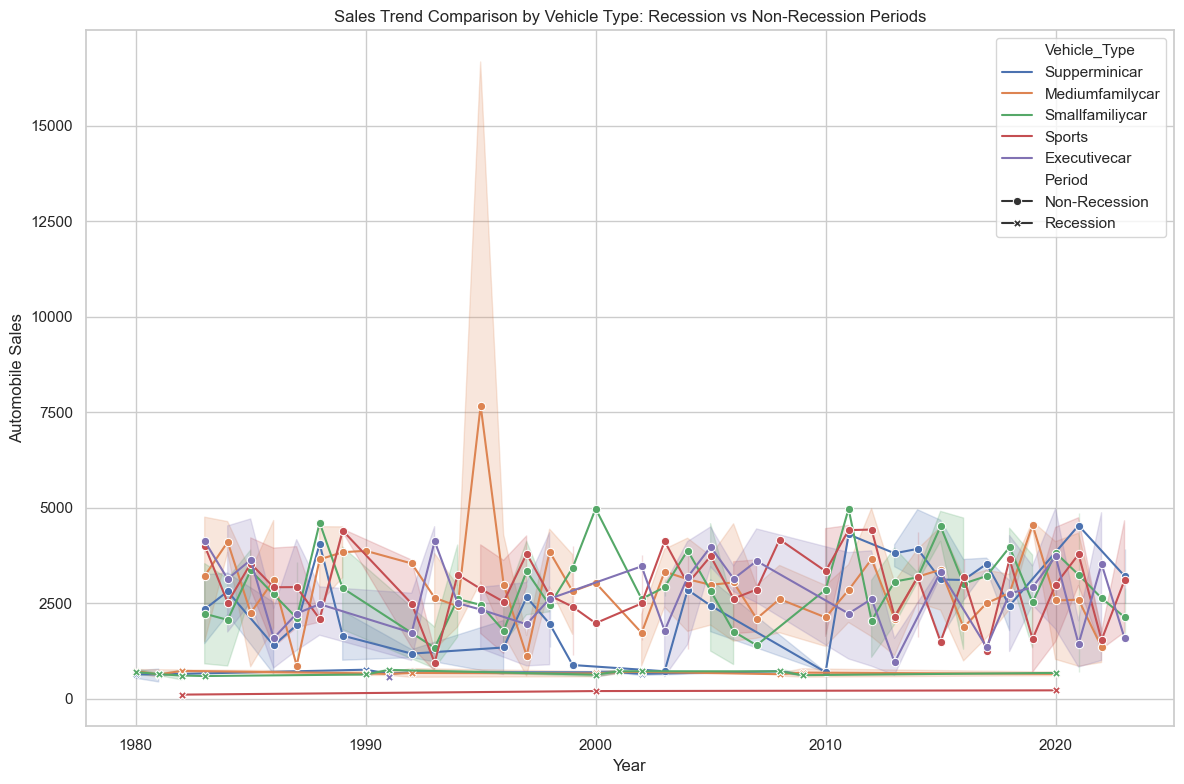

In [11]:
#Q 3: Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non- recession period.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv(file_path)

data['Year'] = data['Year'].astype(int)
data['Recession'] = data['Recession'].astype('category')

data['Period'] = data['Recession'].map({0: 'Non-Recession', 1: 'Recession'})

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

sns.lineplot(data=data, x='Year', y='Automobile_Sales', hue='Vehicle_Type', style='Period', markers=True, dashes=False)

plt.title('Sales Trend Comparison by Vehicle Type: Recession vs Non-Recession Periods')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')

plt.tight_layout()
plt.show()


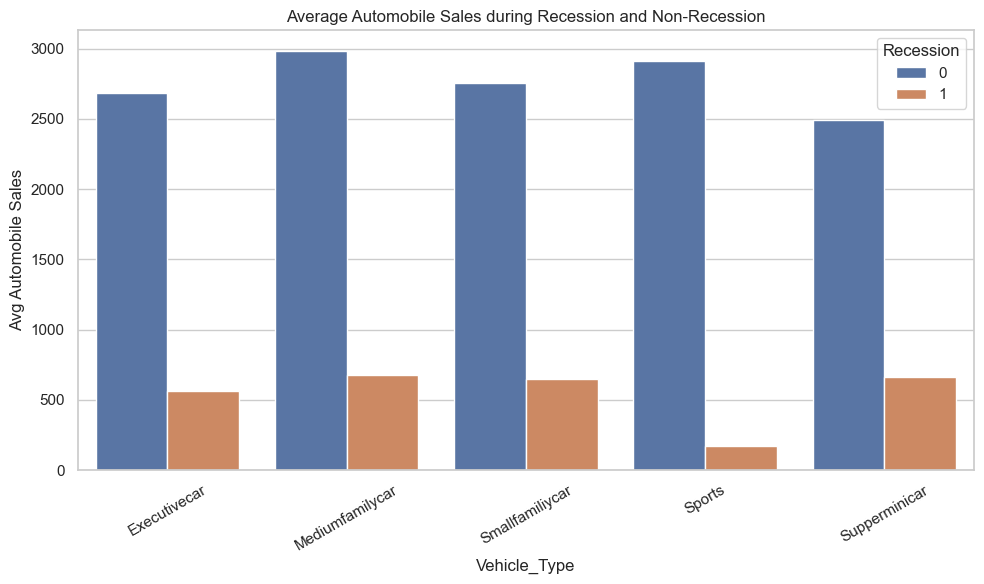

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "C:\\Users\\dhruv\\Downloads\\historical_automobile_sales.csv"
df = pd.read_csv(file_path)

# Group by Recession and Vehicle_Type, and calculate average sales
grouped_df = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_df, x='Vehicle_Type', y='Automobile_Sales', hue='Recession')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.ylabel('Avg Automobile Sales')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()
